In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import sys,dateutil.parser


import macd1
import pandas.io.data as web
import matplotlib.pyplot as plt
import multiprocessing as mp
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

#PAIR='XETHZUSD_1440'
PAIR='XXBTZUSD_1440'
FROM = '2012-01-01 00:00:00.000000'

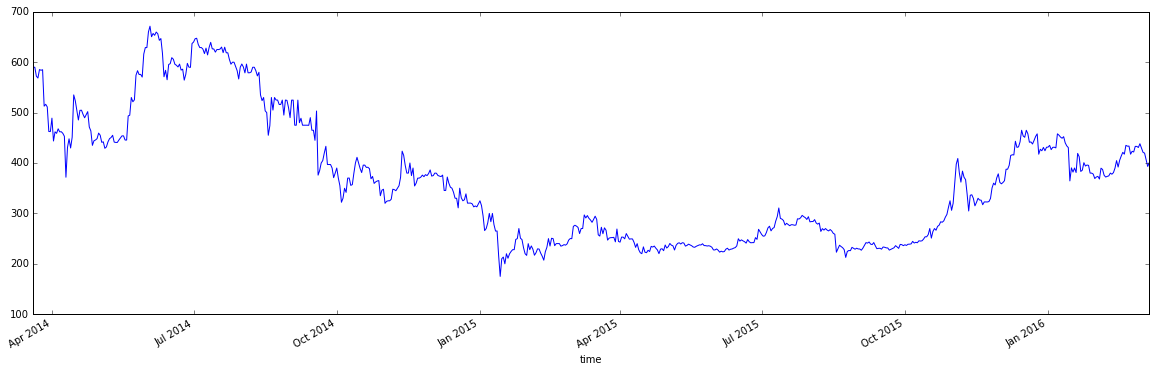

In [2]:

#simple price plot
filename='source/kraken.h5'
h5 = pd.HDFStore(filename, 'r')
#print (h5['XETHZUSD_1440']['high'].astype(float))
rcParams['figure.figsize'] = 20, 6
h5[PAIR]['close'].astype(float).plot()





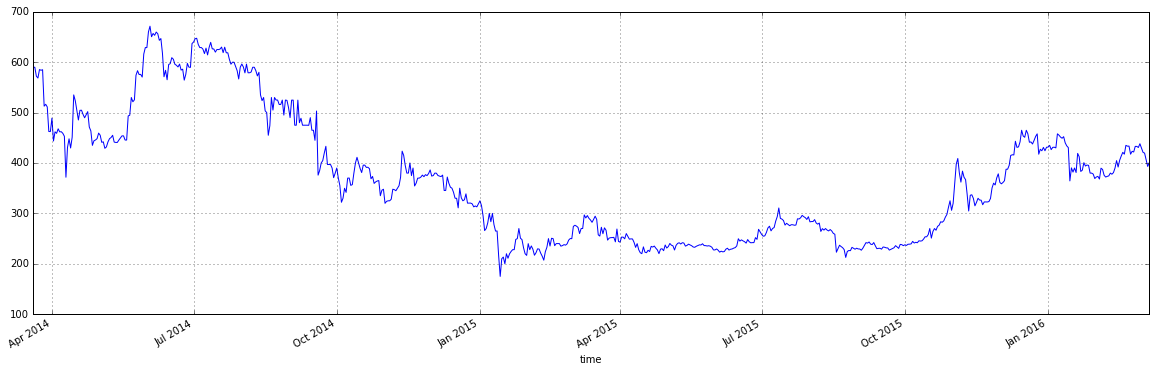

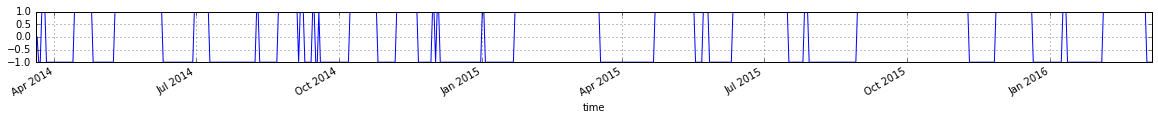

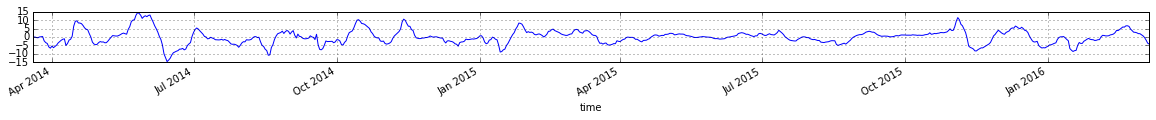

In [3]:
# macd and regime

filename='source/kraken.h5'
h5 = pd.HDFStore(filename, 'r')
rcParams['figure.figsize'] = 20, 6
df=h5[PAIR]
dtSlice = df[df.index > dateutil.parser.parse(FROM)]
dt = macd1.compMacd(dtSlice,macd1.compTradeDmacd)
fig, axs1 = plt.subplots(1,1)
dt['close'].astype(float).plot(ax=axs1, grid=True)

figsize2=(20, 1)
fig, axs2 = plt.subplots(1,1)
dt['regime'].plot(ax=axs2,figsize=figsize2, grid=True)

figsize3=(20, 1)
fig, axs3 = plt.subplots(1,1)
dt['dmacd'].plot(ax=axs3,figsize=figsize3, grid=True)


In [ ]:
#comparison between market and strategy
dcumsum = dt[['market','strategy']].cumsum() 
lpos=len(dcumsum)-1
strat=np.exp(dcumsum['strategy'][lpos])
bhold=np.exp(dcumsum['market'][lpos])
print bhold,strat